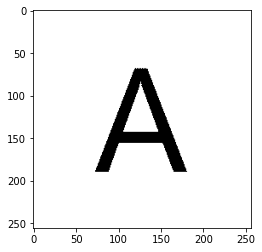

In [4]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
import optimize

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")

# avg

In [5]:
K = 7
TIMES = 10
ks = [i for i in range(2, K + 1)]
result = []

for i in ks:
    item = []
    for _ in range(TIMES):
        item.append(optimize.optimize_sa3(i, markov=2000 * i, initial_temp=0.1, terminated_temp=0.1 / (2000 * i), ws=50))
    result.append(item)
    print(f"k={i} Done.")


k=2 Done.
k=3 Done.
k=4 Done.
k=5 Done.
k=6 Done.
k=7 Done.


[0.22880251182400535, 0.1578047549233529, 0.08940742009932726, 0.08991991844364797, 0.08942013969171213, 0.07046997490783644]


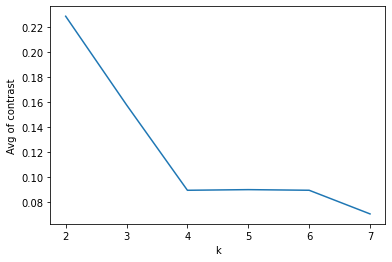

In [6]:
avg_contrast = []
for opt in result:
    avg_contrast.append(sum(list(map(lambda x: x.contrast, opt))) / TIMES)
plt.xlabel('k')
plt.ylabel('Avg of contrast')
plt.plot(ks, avg_contrast)
print(avg_contrast)